\begin{align}
\frac{dx}{dt} & = \alpha x - \beta x y \\[6pt]
\frac{dy}{dt} & = \delta x y  - \gamma y
\end{align}

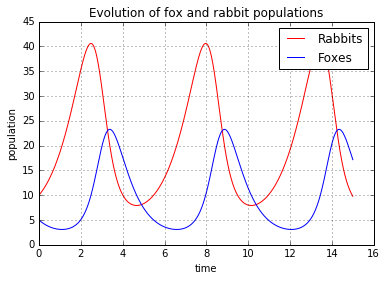

In [10]:
from numpy import *
import pylab as p
from ipywidgets import *
%matplotlib inline

a = 1.
b = 0.1
c = 1.5
d = 0.75

def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ a*X[0] -   b*X[0]*X[1] ,  
                  -c*X[1] + d*b*X[0]*X[1] ])

def d2X_dt2(X, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ])  
def lv(a,b,c,d):
    X_f0 = array([     0. ,  0.])
    X_f1 = array([ c/(d*b), a/b])

    all(dX_dt(X_f0) == zeros(2) ) and all(dX_dt(X_f1) == zeros(2)) # => True 


    A_f1 = d2X_dt2(X_f1)                    # >>> array([[ 0.  , -2.  ],
                                        #            [ 0.75,  0.  ]])

    lambda1, lambda2 = linalg.eigvals(A_f1) # >>> (1.22474j, -1.22474j)

    T_f1 = 2*pi/abs(lambda1)                # >>> 5.130199
    from scipy import integrate

    t = linspace(0, 15,  1000)              # time
    X0 = array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes  
    
    X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
    infodict['message']                     # >>> 'Integration successful.'
    rabbits, foxes = X.T

#f1=p.figure()

#lv(a,b,c,d)
    p.plot(t, rabbits, 'r-', label='Rabbits')
    p.plot(t, foxes  , 'b-', label='Foxes')
    p.grid()
    p.legend()
    p.xlabel('time')
    p.ylabel('population')
    p.title('Evolution of fox and rabbit populations')
    p.show()
lv(a,b,c,d)

#interact (lv, a=(1,5,1),b=(0.1,1.,0.01),c=(1.5,5,.5),d=(0.75,2.,0.1))



In [11]:
print X

[[ 10.           5.        ]
 [ 10.07578091   4.94421976]
 [ 10.1529783    4.88948321]
 ..., 
 [  9.99869712  17.56204194]
 [  9.8872779   17.3642589 ]
 [  9.78000354  17.16658946]]


In [12]:
print infodict

{'nfe': array([ 15,  17,  19,  21,  23,  23,  25,  25,  27,  27,  29,  29,  31,
        31,  33,  33,  33,  33,  35,  35,  35,  35,  35,  37,  37,  37,
        37,  39,  39,  39,  39,  41,  41,  41,  41,  43,  43,  43,  43,
        43,  45,  45,  45,  45,  47,  47,  47,  47,  47,  49,  49,  49,
        49,  49,  51,  51,  51,  51,  51,  55,  55,  55,  55,  57,  57,
        57,  57,  59,  59,  59,  59,  61,  61,  61,  61,  63,  63,  63,
        63,  65,  65,  65,  65,  67,  67,  67,  67,  69,  69,  69,  69,
        73,  73,  73,  75,  75,  75,  75,  77,  77,  77,  79,  79,  79,
        81,  81,  81,  81,  83,  83,  83,  85,  85,  85,  85,  87,  87,
        87,  89,  89,  89,  89,  91,  91,  91,  91,  93,  93,  93,  93,
        97,  97,  97,  99,  99,  99, 101, 101, 101, 103, 103, 103, 105,
       105, 105, 107, 107, 107, 109, 109, 109, 109, 111, 111, 111, 113,
       113, 113, 113, 117, 117, 117, 119, 119, 119, 121, 121, 121, 123,
       123, 125, 125, 125, 127, 127, 127, 129, 129, 129,

In [13]:
print X.T

[[ 10.          10.07578091  10.1529783  ...,   9.99869712   9.8872779
    9.78000354]
 [  5.           4.94421976   4.88948321 ...,  17.56204194  17.3642589
   17.16658946]]
